In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 5.0 MB/s 
     |████████████████████████████████| 212 kB 84.4 MB/s 
     |████████████████████████████████| 115 kB 72.4 MB/s 
     |████████████████████████████████| 163 kB 74.6 MB/s 
     |████████████████████████████████| 127 kB 88.9 MB/s 
     |████████████████████████████████| 115 kB 94.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import datasets

In [ ]:
# https://huggingface.co/datasets/imdb

dataset = datasets.load_dataset('imdb')

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
dataset['train']['label'][-100:-1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

## Load Embeddings

In [ ]:
import gensim.downloader

In [ ]:
w2vec = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
w2v_weights = w2vec.wv.vectors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
w2v_weights

array([[ 1.1291504e-03, -8.9645386e-04,  3.1852722e-04, ...,
        -1.5640259e-03, -1.2302399e-04, -8.6307526e-05],
       [ 7.0312500e-02,  8.6914062e-02,  8.7890625e-02, ...,
        -4.7607422e-02,  1.4465332e-02, -6.2500000e-02],
       [-1.1779785e-02, -4.7363281e-02,  4.4677734e-02, ...,
         7.1289062e-02, -3.4912109e-02,  2.4169922e-02],
       ...,
       [-1.9653320e-02, -9.0820312e-02, -1.9409180e-02, ...,
        -1.6357422e-02, -1.3427734e-02,  4.6630859e-02],
       [ 3.2714844e-02, -3.2226562e-02,  3.6132812e-02, ...,
        -8.8500977e-03,  2.6977539e-02,  1.9042969e-02],
       [ 4.5166016e-02, -4.5166016e-02, -3.9367676e-03, ...,
         7.9589844e-02,  7.2265625e-02,  1.3000488e-02]], dtype=float32)

In [ ]:
w2vec.vocab['stage'].index

943

# Tokenizer

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

In [ ]:
def split_tokens(row):
    row['tokens'] = tokenizer(row['text'])
    return row

In [ ]:
dataset = dataset.map(split_tokens)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/50000 [00:00<?, ?ex/s]

In [ ]:
dataset['train']['tokens'][0]

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.',
 'i',
 'also',
 'heard',
 'that',
 'at',
 'first',
 'it',
 'was',
 'seized',
 'by',
 'u',
 '.',
 's',
 '.',
 'customs',
 'if',
 'it',
 'ever',
 'tried',
 'to',
 'enter',
 'this',
 'country',
 ',',
 'therefore',
 'being',
 'a',
 'fan',
 'of',
 'films',
 'considered',
 'controversial',
 'i',
 'really',
 'had',
 'to',
 'see',
 'this',
 'for',
 'myself',
 '.',
 'the',
 'plot',
 'is',
 'centered',
 'around',
 'a',
 'young',
 'swedish',
 'drama',
 'student',
 'named',
 'lena',
 'who',
 'wants',
 'to',
 'learn',
 'everything',
 'she',
 'can',
 'about',
 'life',
 '.',
 'in',
 'particular',
 'she',
 'wants',
 'to',
 'focus',
 'her',
 'attentions',
 'to',
 'making',
 'some',
 'sort',
 'of',
 'documentary',
 'on',
 'what',
 'the',
 'average',
 'swede',
 'thought',


In [ ]:
# from torchtext.vocab import build_vocab_from_iterator
# vocab = build_vocab_from_iterator(dataset['train']['tokens'], max_tokens=10000, specials=['<unk>'])
# vocab.set_default_index(vocab['<unk>'])

In [ ]:
# vocab['<unk>']

In [ ]:
def vocab(tokens):
  result = []
  for token in tokens:
    try:
      result.append(w2vec.vocab[token].index)
    except KeyError:
      continue

  return result

In [ ]:
vocab(['here', 'is', 'an', 'asdasdasd', 'example'])

[227, 4, 27, 1026]

In [ ]:
def token2id(row):
    row['tokens_id'] = vocab(row['tokens'])
    return row

In [ ]:
dataset = dataset.map(token2id)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/50000 [00:00<?, ?ex/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 50000
    })
})

In [ ]:
dataset['train']['tokens_id'][0]

[4501,
 10042,
 4501,
 248,
 17,
 126,
 739,
 1001,
 96,
 52,
 11,
 4444,
 3,
 5349,
 15,
 61,
 15,
 10,
 56,
 582,
 1,
 4501,
 53,
 997,
 3,
 12,
 56,
 15,
 10,
 3684,
 18,
 16205,
 1280,
 9249,
 88,
 15,
 518,
 940,
 2045,
 28,
 198,
 2855,
 120,
 2186,
 2485,
 1071,
 3435,
 4501,
 230,
 35,
 158,
 28,
 2,
 2021,
 11,
 4123,
 4,
 7001,
 187,
 533,
 350378,
 3452,
 930,
 945,
 765221,
 31,
 757,
 1234,
 838,
 74,
 50,
 46,
 258,
 1,
 1597,
 74,
 757,
 834,
 67,
 44200,
 321,
 78,
 1933,
 5261,
 5,
 83,
 11,
 525,
 407777,
 572,
 46,
 949,
 450,
 542,
 136,
 14,
 11,
 458940,
 556,
 517,
 542,
 1,
 11,
 7925,
 744,
 1,
 171,
 1707,
 2803,
 4476,
 49148,
 1416889,
 46,
 30,
 3544,
 5,
 2029,
 74,
 24,
 1917,
 8,
 67,
 3452,
 1984,
 11166,
 2487,
 437,
 83,
 4333,
 170,
 46,
 4501,
 248,
 4,
 3,
 77,
 289,
 28,
 10,
 1071,
 24532,
 230,
 11,
 1917,
 24161,
 3972,
 19,
 278,
 353,
 171,
 155,
 145,
 15,
 1280,
 13,
 441,
 87,
 78,
 22319,
 107,
 78868,
 118,
 126,
 25910,
 1252,
 359,
 15

# Pytorch Dataset

In [1]:
from torch.utils.data import Dataset, DataLoader

In [2]:
class IMDBDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.data = [i for i in dataset['tokens_id']]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      return torch.LongTensor(self.data[idx]), torch.tensor(self.dataset['label'][idx], dtype=torch.float32)

In [3]:
xx = IMDBDataset(dataset['train'])

NameError: ignored

In [ ]:
xx[0]

In [ ]:
xx[0][1]

In [ ]:
dataloader = DataLoader(IMDBDataset(dataset['train']), shuffle=True)

In [ ]:
for X, y in dataloader:
    print(X[0])
    print('X shape: ', len(X[0]))
    print('y shape: ', y.shape, y.dtype)
    break

In [ ]:
dataset

# Network

In [ ]:
from torch import nn

EMBED_LEN = 300
HIDDEN_DIM = 10
N_LAYERS = 2

class TextClassifier(nn.Module):
  def __init__(self):
    super(TextClassifier, self).__init__()

    # self.embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=EMBED_LEN)
    self.embedding_layer = nn.Embedding.from_pretrained(torch.FloatTensor(w2v_weights))
    self.rnn = nn.RNN(input_size=EMBED_LEN, hidden_size=HIDDEN_DIM, num_layers=N_LAYERS)
    self.linear = nn.Linear(HIDDEN_DIM, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, input):
    print('\ninput:', input)
    print('input shape:', input.shape)
    print('\n')

    embeddings = self.embedding_layer(input)

    print('embedding:', embeddings)
    print('embedding shape:', embeddings.shape)
    print('\n')

    output, hidden = self.rnn(embeddings)

    print('output:', output)
    print('output shape:', output.shape)
    print('\n')

    return self.sigmoid(self.linear(output[:, -1]))  # último output do exemplo



In [ ]:
model = TextClassifier()

# Train Model

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.current_device()

0

In [ ]:
model = TextClassifier()

device = torch.device('cuda')
# device = torch.device('cpu')
model.to(device)

LR = 1e-2
EPOCHS = 1
loss_fn = nn.BCELoss()  # loss function para problemas com duas classes
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
loss_fn(torch.Tensor([0]), torch.Tensor([1.0]))

tensor(100.)

In [ ]:
from tqdm import tqdm

progress_bar = tqdm(range(EPOCHS*len(dataloader)))
running_loss = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for data, label in dataloader:
        data, label = data.to(device), label.to(device)
        
        # print('data:', data)
        # print('data shape:', data.shape)

        out_temp = model(data)

        # print('out_temp:', out_temp)
        # print('out_temp shape:', out_temp.shape)

        out = torch.flatten(out_temp)

        # print('out flatten:', out)
        # print('out flatten shape:', out.shape)

        loss = loss_fn(out, label)

        epoch_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        break

        progress_bar.update(1)
    
    epoch_loss /= len(dataloader)  # média do loss
    running_loss.append(epoch_loss)
    print(' epoch loss:', epoch_loss)

    if epoch % 10 == 0:
        torch.save(model, 'rnn' + str(epoch) + '.pt')


  0%|          | 0/25000 [09:25<?, ?it/s]



input: tensor([[   4501,     263,     126,    1211,     158,  404759,    3009,      63,
              11,     655,     231,    2021,    9075,   14014,      56,     104,
              15,      10,    1749,    4501,    1129,      18,     126,    1453,
              11,    1368,     809,    2579,     205,      19,     335,    4080,
           10346,    6032,    8580,   31259,    4240,   11133,      17,      11,
            1403,  404759,    3009,       4,   12197,      60,       3,     713,
              11,    6032,       4,    9930,    9814,      11,     758,     625,
               4,     407,       8,   13398,  608426,      18,  529523,  585679,
              31,       4,   53592,   14130,     294,     518,    1724,   12675,
            4968,      11,  645898,    4759,    1121,     117,      11,   65526,
            3304,      19,   44059,   24694,  404759,    1280,    1458,       4,
            2107,       8,    1651,    8547,      15,    1280,     267,    1325,
              61,   

In [ ]:
torch.save(model, 'rnn.pt')

100%|██████████| 1250000/1250000 [4:28:48<00:00, 80.35it/s]

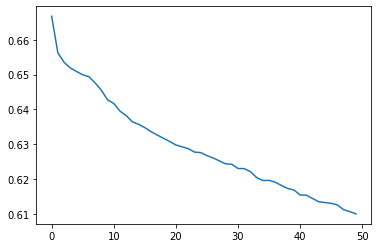

In [ ]:
import matplotlib.pyplot as plt
plt.plot(running_loss)

In [ ]:
dataloader_test = DataLoader(IMDBDataset(dataset['test']), shuffle=True)

correct = 0
total = 0

for data, label in dataloader:
    total += 1
    model.eval()
    data, label = data.to(device), label.to(device)
    out = torch.flatten(model(data))
    label_out = 1 if out > 0.5 else 0

    print(label_out, ' - ', label[0])

    if label_out == label[0]:
        correct += 1

        

A saída de streaming foi truncada nas últimas 5000 linhas.
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(0., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(1., device='cuda:0')
1  -  tensor(1., device='cuda:0')
0  -  tensor(0., device='cuda:0')
1  -  tensor(1., device

In [ ]:
correct/total

0.6528